1번

* 제공된 salary.csv의 YearsExperience, Salary를 사용하여 Linear Regression 모델을 정의하시오.
-> 그래프에 산점도를 표현하고, Regression직선을 출력하시오.



In [0]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.cluster import KMeans


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.spatial.distance import cdist

# !pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise import accuracy

from collections import defaultdict

import seaborn as sns
import os

In [45]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [0]:
x = df["YearsExperience"].values.reshape(-1,1)
y = df["Salary"].values.reshape(-1,1)

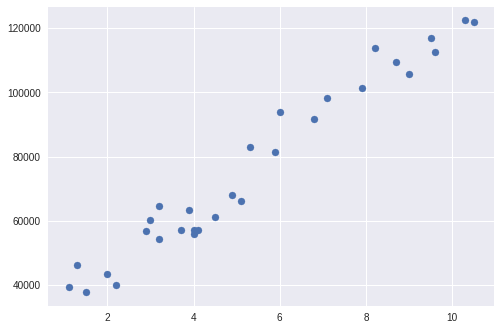

In [55]:
plt.scatter(x,y)
plt.show()

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
LR = LinearRegression().fit(xtrain,ytrain)

In [0]:
LR_Result = LR.predict(xtest)

In [59]:
ytest.shape, LR_Result.shape

((6, 1), (6, 1))

In [63]:
LR_Result, ytest

(array([[ 40748.96184072],
        [122699.62295594],
        [ 64961.65717022],
        [ 63099.14214487],
        [115249.56285456],
        [107799.50275317]]), array([[ 37731.],
        [122391.],
        [ 57081.],
        [ 63218.],
        [116969.],
        [109431.]]))

다음의 데이터를 이용하여 Linear Regression을 정의하시오.
- 그래프를 출력하고, x3를 입력하여 예측하시오.
- trainset
x2 = np.array([0,1,2,3,4,5,6,7,8,9])
y2 = np.array([1,2,2,5,6,8,9,10,10,11])
- testset
x3 = np.array([1.5,2.5,3.5])


In [95]:
# - trainset
x2 = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
y2 = np.array([[1],[2],[2],[5],[6],[8],[9],[10],[10],[11]])
# - testset
x3 = np.array([[1.5],[2.5],[3.5]])
x2.shape,y2.shape


((10, 1), (10, 1))

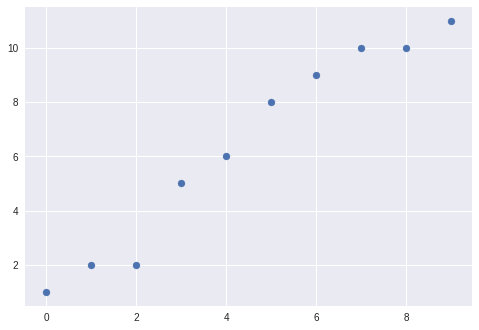

In [99]:
plt.scatter(x2,y2)
plt.show()

In [96]:
x2.reshape(1,-1)
y2.reshape(1,-1)
x2.shape,y2.shape

((10, 1), (10, 1))

In [0]:
LR2 = LinearRegression().fit(x2,y2)

In [98]:
LR2.predict(x3)

array([[2.76363636],
       [3.97575758],
       [5.18787879]])


* 다음의 데이터를 이용하여 Logistics Regression을 정의하시오. Diabetes.csv
-> test_size를 0.2로 정의하고 테스트하시오.

In [100]:
df2 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/Diabetes.csv")
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
x4 = df2.iloc[:,:-1] 
y4 = df2.iloc[:,-1]

In [117]:
x4.shape,y4.shape

((768, 8), (768,))

In [0]:
xtrain4,xtest4,ytrain4,ytest4 = train_test_split(x4,y4,test_size=0.2,random_state=0)

In [126]:
LR3 = LogisticRegression().fit(xtrain4,ytrain4)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
LR3_Result= LR3.predict(xtest4)

In [129]:
metrics.accuracy_score(ytest4,LR3_Result)

0.8181818181818182

2번

* sklearn datasets
iris = datasets.load_iris()를 사용하여 
k-nearest 사용하여 다음의 값을 입력하고 분류하시오.

[9,3]



In [0]:
iris = datasets.load_iris()

In [141]:
iris_x = iris.data
iris_x = iris_x[:,:2]
iris_y = iris.target
iris_x.shape,iris_y.shape,

((150, 2), (150,))

In [0]:
iris_KNN = neighbors.KNeighborsClassifier().fit(iris_x,iris_y)

In [144]:
iris_test = np.array([[9,3]])
iris_KNN.predict(iris_test)

array([2])


* TestData.csv이용해서 K Nearest Neighbors 알고리즘을 사용해서 다음의 값(Height, Weight, Age, Class)을 입력하고 예측하시오.

[1.90,80,40]




In [145]:
df3 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/TestData.csv")
df3.head()

,Height,Weight,Age,Class
0,1.70,65,20,Programmer
1,1.90,85,33,Builder
2,1.78,76,31,Builder
3,1.73,74,24,Programmer
4,1.81,75,35,Builder


In [153]:
Test_x = df3.iloc[:,:3]
Test_y = df3.iloc[:,3]

0    Programmer
1       Builder
2       Builder
3    Programmer
4       Builder
5     Scientist
6     Scientist
7    Programmer
Name: Class, dtype: object

In [0]:
Test_KNN = neighbors.KNeighborsClassifier().fit(Test_x,Test_y)

In [155]:
Test_KNN.predict([[1.90,80,40]])

array(['Builder'], dtype=object)

* datasets.load_breast_cancer()을 이용하여 
linear모델을 사용하여 정확도(accuracy)를 구하시오.

In [0]:
cancer = datasets.load_breast_cancer()

In [0]:
cancer_x = cancer.data
cancer_y = cancer.target
cancer_x.shape,cancer_y.shape
cxtrain,cxtest,cytrain, cytest= train_test_split(cancer_x,cancer_y,test_size=0.2,random_state=0)

In [0]:
cancer_linear = LinearRegression().fit(cxtrain,cytrain)

In [164]:
cancer_linear.predict(cxtest)

array([ 0.22679212,  0.81077975,  0.98084002,  0.80068987,  0.96765246,
        0.91974591,  1.05073582,  0.97227211,  1.09708963,  1.07635347,
        0.72658552,  0.7643809 ,  1.27304542,  0.70636981,  0.62812712,
        0.21499475,  1.04267545,  0.09973831,  0.13418174, -0.1285267 ,
        0.04784891,  0.32658558,  0.8307249 ,  0.97190326,  0.24768799,
        0.94718396,  1.10108626,  0.32958073,  0.92810512,  0.02450828,
        1.03919938,  0.19075134,  0.67173532,  0.39537388,  1.28921647,
        0.0939452 ,  0.74440176,  0.3405336 ,  0.7738262 ,  0.01919545,
        0.41518808,  1.17048945,  0.48965666,  1.17531222,  0.5931423 ,
       -0.27401383,  1.36919891,  0.80239527,  0.98867349, -0.06028005,
        0.56278973,  0.64531451,  0.18540071,  0.91602002,  0.96310477,
        0.93386206,  1.04527449,  0.78315363,  0.86458183,  0.02317142,
        0.1293304 ,  0.19418026,  1.16610257,  0.88911266,  0.03479851,
        0.71903758, -0.5903536 , -0.32570798,  0.15595702,  1.02

3번 

* from sklearn.datasets import load_breast_cancer
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

데이터를 사용하여 
- KNeighborsClassifier
- SVM
- DecisionTree
- LogisticRegression

각각의 accuracy_score 데이터를 임의적으로 만들어서 3가지를 비교해보시오.

In [165]:
cancer_KNN = neighbors.KNeighborsClassifier().fit(cxtrain,cytrain)
cancer_SVM = SVC().fit(cxtrain,cytrain)
cancer_DT = DecisionTreeClassifier().fit(cxtrain,cytrain)
cancer_LR = LogisticRegression().fit(cxtrain,cytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
cK_Result = cancer_KNN.predict(cxtest)
cS_Result = cancer_SVM.predict(cxtest)
cD_Result = cancer_DT.predict(cxtest)
cL_Result = cancer_LR.predict(cxtest)

In [0]:
cK_Ac = metrics.accuracy_score(cytest, cK_Result)
cS_Ac = metrics.accuracy_score(cytest, cS_Result)
cD_Ac = metrics.accuracy_score(cytest, cD_Result)
cL_Ac = metrics.accuracy_score(cytest, cL_Result)

In [171]:
print(cK_Ac,cS_Ac,cD_Ac,cL_Ac)

0.9385964912280702 0.5877192982456141 0.9122807017543859 0.956140350877193


4번 

* Diabetes.csv를 사용하여 DecisionTree를 사용하여 
accuracy_score,metrics.precision_score, metrics.recall_score을 구하시오.




In [0]:
# df2 , xtrain4, xtest4, ytrain4, ytest4

Dia_DT = DecisionTreeClassifier().fit(xtrain4,ytrain4)
Dia_Result = Dia_DT.predict(xtest4)

In [0]:
Dia_Ac = metrics.accuracy_score(ytest4,Dia_Result)
Dia_Pr = metrics.precision_score(ytest4,Dia_Result)
Dia_Re = metrics.recall_score(ytest4,Dia_Result)

In [174]:
print(Dia_Ac,Dia_Pr,Dia_Re)

0.7792207792207793 0.6181818181818182 0.723404255319149


* 다음 데이터셋을 이용하여 VotingClassifier사용하여 
정확도를 구하시오.

from pydataset import data
df = data('Housing')

=> 다음의 Classfiters등을 사용함.
lr = LogisticRegression()

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()


In [176]:
# !pip install pydataset

    100% |████████████████████████████████| 15.9MB 2.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset


In [197]:
from pydataset import data
df_Housing = data('Housing')
df_Housing.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [0]:
# enumerate 필요
H_x = df_Housing[['lotsize',	'bedrooms',	'bathrms',	'stories','garagepl']]
H_y = df_Housing['price']
Hxtrain,Hxtest,Hytrain,Hytest = train_test_split(H_x,H_y,test_size=0.3,random_state=0)

In [195]:
H_x.shape,H_y.shape

((546, 5), (546,))

In [188]:
lr = LogisticRegression()
knn = neighbors.KNeighborsClassifier()
dt = DecisionTreeClassifier()

classifiers = [('LR',lr),("KNN",knn),("DT",dt)]

for name, clf in classifiers:
  clf.fit(Hxtrain,Hytrain)
  Result = clf.predict(Hxtest)
  accuracy = metrics.accuracy_score(Hytest,Result)
  print(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.012195121951219513
0.006097560975609756
0.012195121951219513


In [200]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(Hxtrain,Hytrain)
vcResult = vc.predict(Hxtest)
vcAccuracy = metrics.accuracy_score(Hytest,vcResult)
print(vcAccuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.012195121951219513


5번

* surprise모듈에서 제공하는 Dataset을 사용하여
df = Dataset.load_builtin('ml-100k')
id가 196번인 사용자에게 10개를 추천하시오.





In [0]:
# !pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise import accuracy

In [209]:
df_ml = Dataset.load_builtin('ml-100k')
df_ml.raw_ratings

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013'),
 ('62', '257', 2.0, '879372434'),
 ('286', '1014', 5.0, '879781125'),
 ('200', '222', 5.0, '876042340'),
 ('210', '40', 3.0, '891035994'),
 ('224', '29', 3.0, '888104457'),
 ('303', '785', 3.0, '879485318'),
 ('122', '387', 5.0, '879270459'),
 ('194', '274', 2.0, '879539794'),
 ('291', '1042', 4.0, '874834944'),
 ('234', '1184', 2.0, '892079237'),
 ('119', '392', 4.0, '886176814'),
 ('167', '486', 4.0, '892738452'),
 ('299', '144', 4.0, '877881320'),
 ('291', '118', 2.0, '874833878'),
 ('308', '1', 4.0, '887736532'),
 ('95', '546', 2.0, '879196566'),
 ('38', '95', 5.0, '892430094'),
 ('102', '768', 2.0, '883748450'),
 ('63', '277', 4.0, '875747401

In [210]:
data = pd.DataFrame(df_ml.raw_ratings, columns=['user','item','rate','id'])
data.head()

,user,item,rate,id
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [212]:
train_data = df_ml.build_full_trainset()
algo = SVD()
algo.train(train_data)

/usr/local/lib/python3.6/dist-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [0]:
test_data = train_data.build_testset()
algo_predict = algo.test(test_data)

In [261]:
accuracy.rmse(algo_predict)

RMSE: 0.6762


0.6762207912846326

In [0]:
algo_predict

In [0]:
def get_top_n(predictions, n=10):
  top_n = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
      top_n[uid].append((iid, est))
  for uid, user_ratings in top_n.items():
      user_ratings.sort(key=lambda x: x[1], reverse=True)
      top_n[uid] = user_ratings[:n]
  return top_n


In [0]:
rResult = get_top_n(algo_predict)

In [268]:
for uid, user_ratings in rResult.items():
  if uid == '196':
    print(uid,[iid for (iid,_) in user_ratings])

196 ['8', '655', '153', '692', '285', '1007', '286', '251', '663', '242']


* Tensorflow를 사용하여 다음을 처리하시오.
w = tf.Variable([0.5], dtype=tf.float32)
b = tf.Variable([-0.5], dtype=tf.float32)
-> Linear Regression을 정의하고 [1, 2, 3, 4] 입력이
   된경우 예측하시오.

In [246]:
w = tf.Variable([0.5], dtype=tf.float32)
b = tf.Variable([-0.5], dtype=tf.float32)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
X = tf.placeholder(tf.float32)

In [0]:
linear_model = w * X + b

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [252]:
sess.run(linear_model,{X:[1,2,3,4]})

array([0. , 0.5, 1. , 1.5], dtype=float32)